<a href="https://colab.research.google.com/github/maryfeizabad/W210-train/blob/main/Copy_of_SUM_SaliencyMamba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br/>
<div align="center">
  <p>
  <strong>SUM - WACV2025</strong>
    <br/><br/>
    <strong>S</strong>aliency <strong>U</strong>nification through <strong>M</strong>amba for Visual Content Prediction
    <br/><br/>
    <a href="https://arxiv.org/abs/2406.17815">Paper</a>
    .
    <a href="https://github.com/Arhosseini77/SUM">Github</a>
    .
    <a href="https://arhosseini77.github.io">Project Page</a>
  </p>
</div>

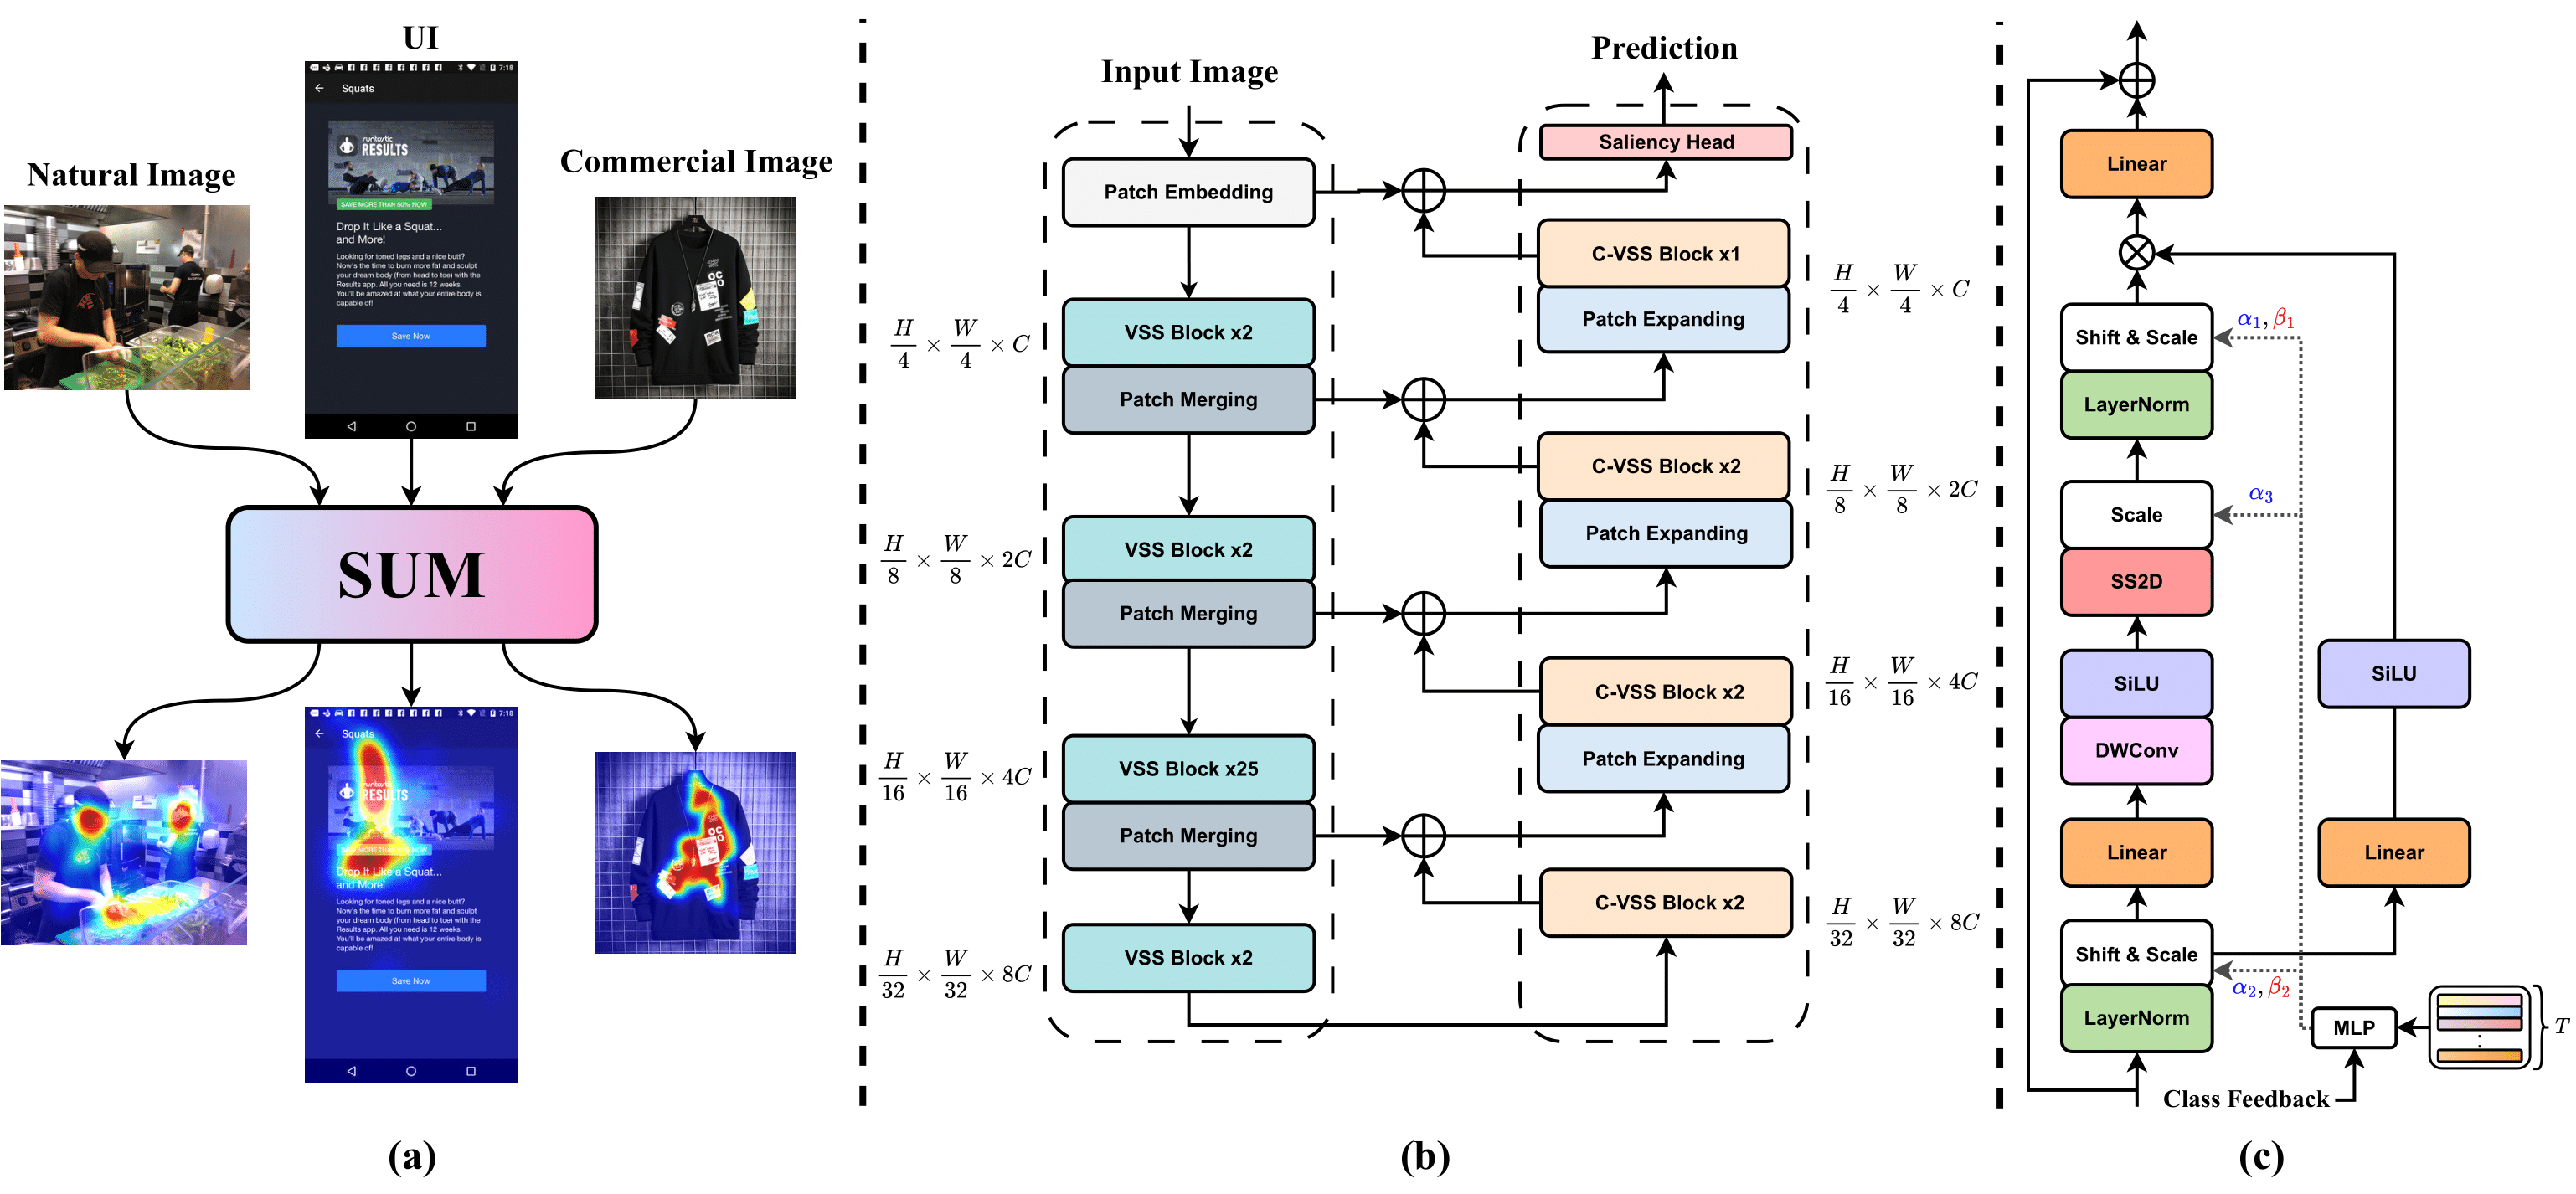

In [ ]:
# Check GPU
!nvidia-smi

Tue Oct  1 20:44:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Installation

In [ ]:
# Clone
!git clone https://github.com/Arhosseini77/SUM
%cd SUM

Cloning into 'SUM'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 71 (delta 28), reused 35 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (71/71), 8.36 MiB | 12.31 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/SUM


In [ ]:
!pwd

/content/SUM


In [ ]:
# Install Requirements
# installation process typically takes around 3-4 minutes in google colab.
!pip install -qq torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu121
!pip install -qq -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 GB 508.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 20.0 MB/s eta 0:00:00


In [ ]:
# Download Weights
!gdown 14ma_hLe8DrVNuHCSKoOz41Q-rB1Hbg6A
!mv sum_model.pth ./net/pre_trained_weights/

Downloading...
From (original): https://drive.google.com/uc?id=14ma_hLe8DrVNuHCSKoOz41Q-rB1Hbg6A
From (redirected): https://drive.google.com/uc?id=14ma_hLe8DrVNuHCSKoOz41Q-rB1Hbg6A&confirm=t&uuid=58e382e8-140f-496a-bd20-e5f92049b25e
To: /content/SUM/sum_model.pth
100% 230M/230M [00:01<00:00, 145MB/s]


## Inference

In [ ]:
!python inference.py --img_path ./assets/525[1].jpg --condition 1 --output_path output_results --heat_map_type HOT

Saved HOT saliency map to output_results/525[1]_saliencymap.png


In [ ]:
!python inference.py --img_path ./assets/input.jpg --condition 1 --output_path output_results --heat_map_type HOT

In [ ]:
!python inference.py --img_path input_image.jpg --condition 2 --output_path output_results --heat_map_type Overlay

Traceback (most recent call last):
  File "/content/SUM/inference.py", line 11, in <module>
    from net.models.SUM import SUM
  File "/content/SUM/net/models/SUM.py", line 1, in <module>
    from .vmamba import VSSM
  File "/content/SUM/net/models/vmamba.py", line 9, in <module>
    from einops import rearrange, repeat
ModuleNotFoundError: No module named 'einops'


### Show Result

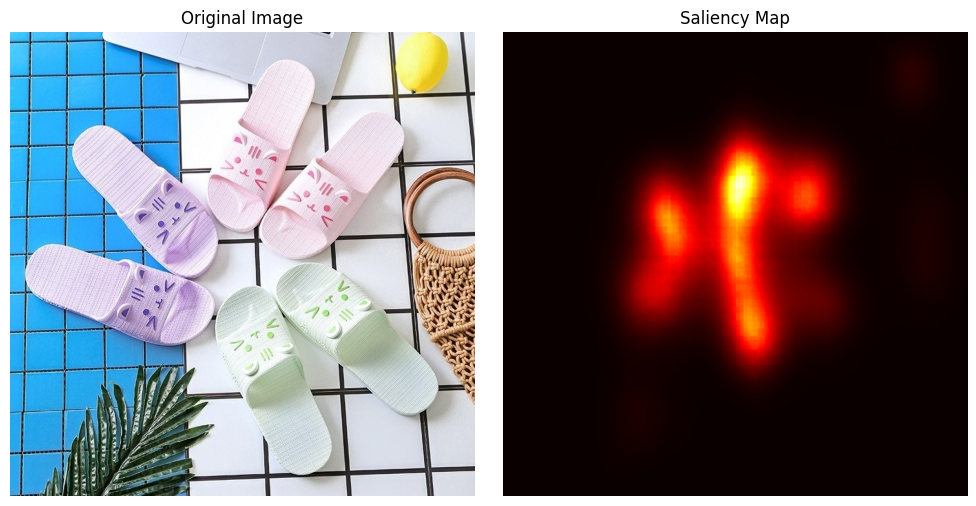

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Paths to your image and saliency map
image_path = 'assets/525[1].jpg'
saliency_map_path = 'output_results/525[1]_saliencymap.png'

# Load the image and the saliency map
image = Image.open(image_path)
saliency_map = Image.open(saliency_map_path)

# Create a figure to display the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust the figsize as needed

# Display the original image
axes[0].imshow(image)
axes[0].axis('off')  # Turn off axis
axes[0].set_title('Original Image')

# Display the saliency map
axes[1].imshow(saliency_map, cmap='hot')
axes[1].axis('off')
axes[1].set_title('Saliency Map')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import io
import os
import argparse
from PIL import Image
import torchvision.transforms as transforms

import numpy as np
import cv2


In [ ]:

import torch

In [ ]:

model = !python inference.py

#saliency_map_prediction(img_path, condition, model, device)

In [ ]:
!python inference.py --img_path ./output_results/525[1]_saliencymap.png --condition 2 --output_path output_results --heat_map_type Overlay

Saved HOT saliency map to output_results/525[1]_saliencymap_saliencymap.png
Saved overlay image to output_results/525[1]_saliencymap_overlay.png


In [ ]:
img_path = './assets/27[1].jpg'
#condition = 1
output_path = './output_results/27[1]_saliencymap.png'

In [ ]:
def load_and_preprocess_image(img_path):
    image = Image.open(img_path).convert('RGB')
    orig_size = image.size
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    image = transform(image)
    return image, orig_size

In [ ]:
def saliency_map_prediction(img_path, condition, model):
    img, orig_size = load_and_preprocess_image(img_path)
    img = img.unsqueeze(0)
    one_hot_condition = torch.zeros((1, 4))
    one_hot_condition[0, condition] = 1
    model.eval()
    with torch.no_grad():
        pred_saliency = model(img, one_hot_condition)

    pred_saliency = pred_saliency.squeeze().cpu().numpy()
    return pred_saliency, orig_size

In [ ]:
def overlay_heatmap_on_image(original_img_path, heatmap_img_path, output_img_path):
    # Read the original image
    orig_image = cv2.imread(original_img_path)
    orig_size = orig_image.shape[:2]  # Height, Width

    # Read the heatmap image
    overlay_heatmap = cv2.imread(heatmap_img_path, cv2.IMREAD_GRAYSCALE)

    # Resize the heatmap to match the original image size
    overlay_heatmap = cv2.resize(overlay_heatmap, (orig_size[1], orig_size[0]))

    # Apply color map to the heatmap
    overlay_heatmap = cv2.applyColorMap(overlay_heatmap, cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    overlay_image = cv2.addWeighted(orig_image, 1, overlay_heatmap, 0.8, 0)

    # Save the result
    cv2.imwrite(output_img_path, overlay_image)



In [ ]:

def main():
    parser = argparse.ArgumentParser(description='Saliency Map Prediction')
    parser.add_argument('--img_path', type=str, required=True)
    parser.add_argument('--condition', type=int, required=True, choices=[0, 1, 2, 3])
    parser.add_argument('--output_path', type=str, default='results')
    parser.add_argument('--heat_map_type', type=str, default='HOT', choices=['HOT', 'Overlay'], help='Type of heatmap: HOT or Overlay')
    args = parser.parse_args()

    if not os.path.exists(args.output_path):
        os.makedirs(args.output_path)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = setup_model(device)

    pred_saliency, orig_size = saliency_map_prediction(args.img_path, args.condition, model, device)

    filename = os.path.splitext(os.path.basename(args.img_path))[0]
    hot_output_filename = os.path.join(args.output_path, f'{filename}_saliencymap.png')

    # Save HOT heatmap
    plt.figure()
    plt.imshow(pred_saliency, cmap='hot')
    plt.axis('off')

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    buf.seek(0)
    plt.close()

    img = Image.open(buf)
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGBA2BGR)
    img_resized = cv2.resize(img_cv, orig_size, interpolation=cv2.INTER_AREA)
    cv2.imwrite(hot_output_filename, img_resized)

    print(f"Saved HOT saliency map to {hot_output_filename}")

    if args.heat_map_type == 'Overlay':
        overlay_output_filename = os.path.join(args.output_path, f'{filename}_overlay.png')
        overlay_heatmap_on_image(args.img_path, hot_output_filename, overlay_output_filename)
        print(f"Saved overlay image to {overlay_output_filename}")


if __name__ == "__main__":
    main()

usage: colab_kernel_launcher.py [-h] --img_path IMG_PATH --condition {0,1,2,3}
                                [--output_path OUTPUT_PATH] [--heat_map_type {HOT,Overlay}]
colab_kernel_launcher.py: error: the following arguments are required: --img_path, --condition


SystemExit: 2

In [ ]:
pred_saliency, orig_size = saliency_map_prediction(img_path, condition, model)


AttributeError: 'SList' object has no attribute 'eval'

## Validation

In [ ]:
# Download and Unzip Datasets
!gdown 1Mdk97UB0phYDZv8zgjBayeC1I1_QcUmh
!unzip -qq saliency_datasets.zip

Downloading...
From (original): https://drive.google.com/uc?id=1Mdk97UB0phYDZv8zgjBayeC1I1_QcUmh
From (redirected): https://drive.google.com/uc?id=1Mdk97UB0phYDZv8zgjBayeC1I1_QcUmh&confirm=t&uuid=6a5ce38e-d020-4059-8337-77fd1f7f4045
To: /content/saliency_datasets.zip
100% 609M/609M [00:02<00:00, 204MB/s]
replace datasets/CAT2000_256/train/train_fixation/Action_001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!python validation.py

Total number of parameters in the model: 57501196
Validating val_loader_0: 100% 313/313 [06:21<00:00,  1.22s/it]
val_loader_0 - Val Metrics: loss: -2.6827 ± 0.3150, kl: 0.1922 ± 0.0232, cc: 0.9093 ± 0.0098, sim: 0.8040 ± 0.0114, nss: 1.9817 ± 0.2018, auc: 0.8755 ± 0.0143
Validating val_loader_1: 100% 9/9 [00:07<00:00,  1.22it/s]
val_loader_1 - Val Metrics: loss: -2.5655 ± 0.5561, kl: 0.3313 ± 0.0409, cc: 0.8630 ± 0.0158, sim: 0.7284 ± 0.0150, nss: 3.4241 ± 0.1522, auc: 0.9246 ± 0.0050
Validating val_loader_2: 100% 25/25 [00:25<00:00,  1.03s/it]
val_loader_2 - Val Metrics: loss: -2.2381 ± 0.3386, kl: 0.2703 ± 0.0241, cc: 0.8816 ± 0.0182, sim: 0.7542 ± 0.0118, nss: 2.4240 ± 0.1218, auc: 0.8876 ± 0.0059
Validating val_loader_3: 100% 13/13 [00:10<00:00,  1.30it/s]
val_loader_3 - Val Metrics: loss: 0.5891 ± 0.7808, kl: 0.5620 ± 0.0500, cc: 0.7700 ± 0.0313, sim: 0.6311 ± 0.0229, nss: 2.8596 ± 0.2495, auc: 0.9136 ± 0.0075
Validating val_loader_4: 100% 7/7 [00:06<00:00,  1.12it/s]
val_loader_4

## Train

In [ ]:
# Download and Unzip Datasets
!gdown 1Mdk97UB0phYDZv8zgjBayeC1I1_QcUmh
!unzip saliency_datasets.zip

Streaming output truncated to the last 5000 lines.
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000313593.jpg  
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000429042.jpg  
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000000939.jpg  
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000001270.jpg  
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000235672.jpg  
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000236234.jpg  
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000236671.jpg  
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000237075.jpg  
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000034657.jpg  
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000169996.jpg  
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000170178.jpg  
  inflating: datasets/salicon_256/stimuli/val/COCO_val2014_000000170393.jpg  
  inflating: 

In [ ]:
# Download Vmamba Pretrained Weight
!gdown 1zUczEDh09Sr2HtQclYwGBvTh0Gwydr52
!mv vssmsmall_dp03_ckpt_epoch_238.pth ./net/pre_trained_weights/

In [ ]:
# In train_colab We set batch size to 4 because of Limitation in Colab VRAM GPU
!python train_colab.py